In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 
import matplotlib.pyplot as plt

In [35]:
str_file = 'element_nonald_O.json'
with open(str_file,'r') as f:
    str1 = f.read()
    ald_mat = json.loads(str1)
# freq, year_freq

In [36]:
group_dict = {}
ELE = ['Li', 'Ni', 'V', 'Zr', 'Fe', 'Cu', 'Sn', 'Al', 'Zn', 'Ti']
ELE.sort(reverse=True)
l = 10
for i in range (0,10):
    l=l-1
    list1 = []
    for j in range (0,10-l):
        if j == 10-l-1:
            list1.append(ELE[i])
        else:
            list1.append(ELE[i] + '_' + ELE[j])
    group_dict[ELE[i]] = list1
group_dict = dict(sorted(group_dict.items(), key=lambda i:i[0]))
group_dict

{'Al': ['Al_Zr',
  'Al_Zn',
  'Al_V',
  'Al_Ti',
  'Al_Sn',
  'Al_Ni',
  'Al_Li',
  'Al_Fe',
  'Al_Cu',
  'Al'],
 'Cu': ['Cu_Zr',
  'Cu_Zn',
  'Cu_V',
  'Cu_Ti',
  'Cu_Sn',
  'Cu_Ni',
  'Cu_Li',
  'Cu_Fe',
  'Cu'],
 'Fe': ['Fe_Zr', 'Fe_Zn', 'Fe_V', 'Fe_Ti', 'Fe_Sn', 'Fe_Ni', 'Fe_Li', 'Fe'],
 'Li': ['Li_Zr', 'Li_Zn', 'Li_V', 'Li_Ti', 'Li_Sn', 'Li_Ni', 'Li'],
 'Ni': ['Ni_Zr', 'Ni_Zn', 'Ni_V', 'Ni_Ti', 'Ni_Sn', 'Ni'],
 'Sn': ['Sn_Zr', 'Sn_Zn', 'Sn_V', 'Sn_Ti', 'Sn'],
 'Ti': ['Ti_Zr', 'Ti_Zn', 'Ti_V', 'Ti'],
 'V': ['V_Zr', 'V_Zn', 'V'],
 'Zn': ['Zn_Zr', 'Zn'],
 'Zr': ['Zr']}

In [19]:
def graph(year):    
    i=0
    y= year #Start Year
    total = 0
    data = []
    data_NM_TOTAL = []
    data_NM_P = []
    Freq_NM = []
    P_NM = []
    Year = 2014
    data = [0,0,0]
    ELE_R = ELE[::-1]
    for i in range(0,10):
        for j in range(0,10-l):
            for a in ald_mat.keys():
                if group_dict[ELE[i]][j] == a:
                    if str(y) in ald_mat[a].keys():
                        for value in ald_mat[a][str(y)].values():
                            total += value
                        data = [total,str(y),group_dict[ELE[i]][j]]

                        data_NM_TOTAL.append(data)
                        if 'o' in ald_mat[a][str(y)].keys():
                            data_P = ald_mat[a][str(y)]['c']/total
                            data = [data_P,str(y),group_dict[ELE[i]][j]]
                        else:
                            data = [0,str(y),group_dict[ELE[i]][j]]
                        data_NM_P.append(data)
                        data_P=0
                    else:
                        data = [0,str(y),group_dict[ELE[i]][j]]
                        data_NM_TOTAL.append(data)
                        data_NM_P.append(data)
                    total=0
            if group_dict[ELE[i]][j] != data[2]:
                data = [0,str(y),group_dict[ELE[i]][j]]
                data_NM_TOTAL.append(data)
                data_NM_P.append(data)
        P = [x[0] for x in data_NM_P]
        data_NM_P = []
        P_NM.append(P)

    #dataframe
    df = pd.DataFrame (P_NM, columns = ELE_R, index = ELE)
    k = 10
    l = 10
    for i in range(0,k):
        for j in range(0,l):
            if P_NM[i][j] == 0 and P_NM[9-j][9-i] != 0:
                P_NM[i][j] = P_NM[9-j][9-i]
            if 9-i != j:
                P_NM[9-j][9-i] = 0
        l = l-1

    df = pd.DataFrame (P_NM, columns = ELE_R, index = ELE)
    fig, ax = plt.subplots(figsize=(3, 4), dpi = 150)
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    def get_custom_color_palette_hash():
        return LinearSegmentedColormap.from_list("", [
            '#000000', '#c9e11f', '#c9e11f',
            '#c9e11f','#c9e11f',
            '#32b67a', '#3a538b', '#470055'
        ])
    cmap = get_custom_color_palette_hash()
    b = sns.heatmap(df,cmap = cmap,vmin=0,vmax=1,
                linewidths=.5,square=True,
                cbar=False)
    sns.set(font_scale = 1)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    b.set_title(str(y))
    plt.show()    

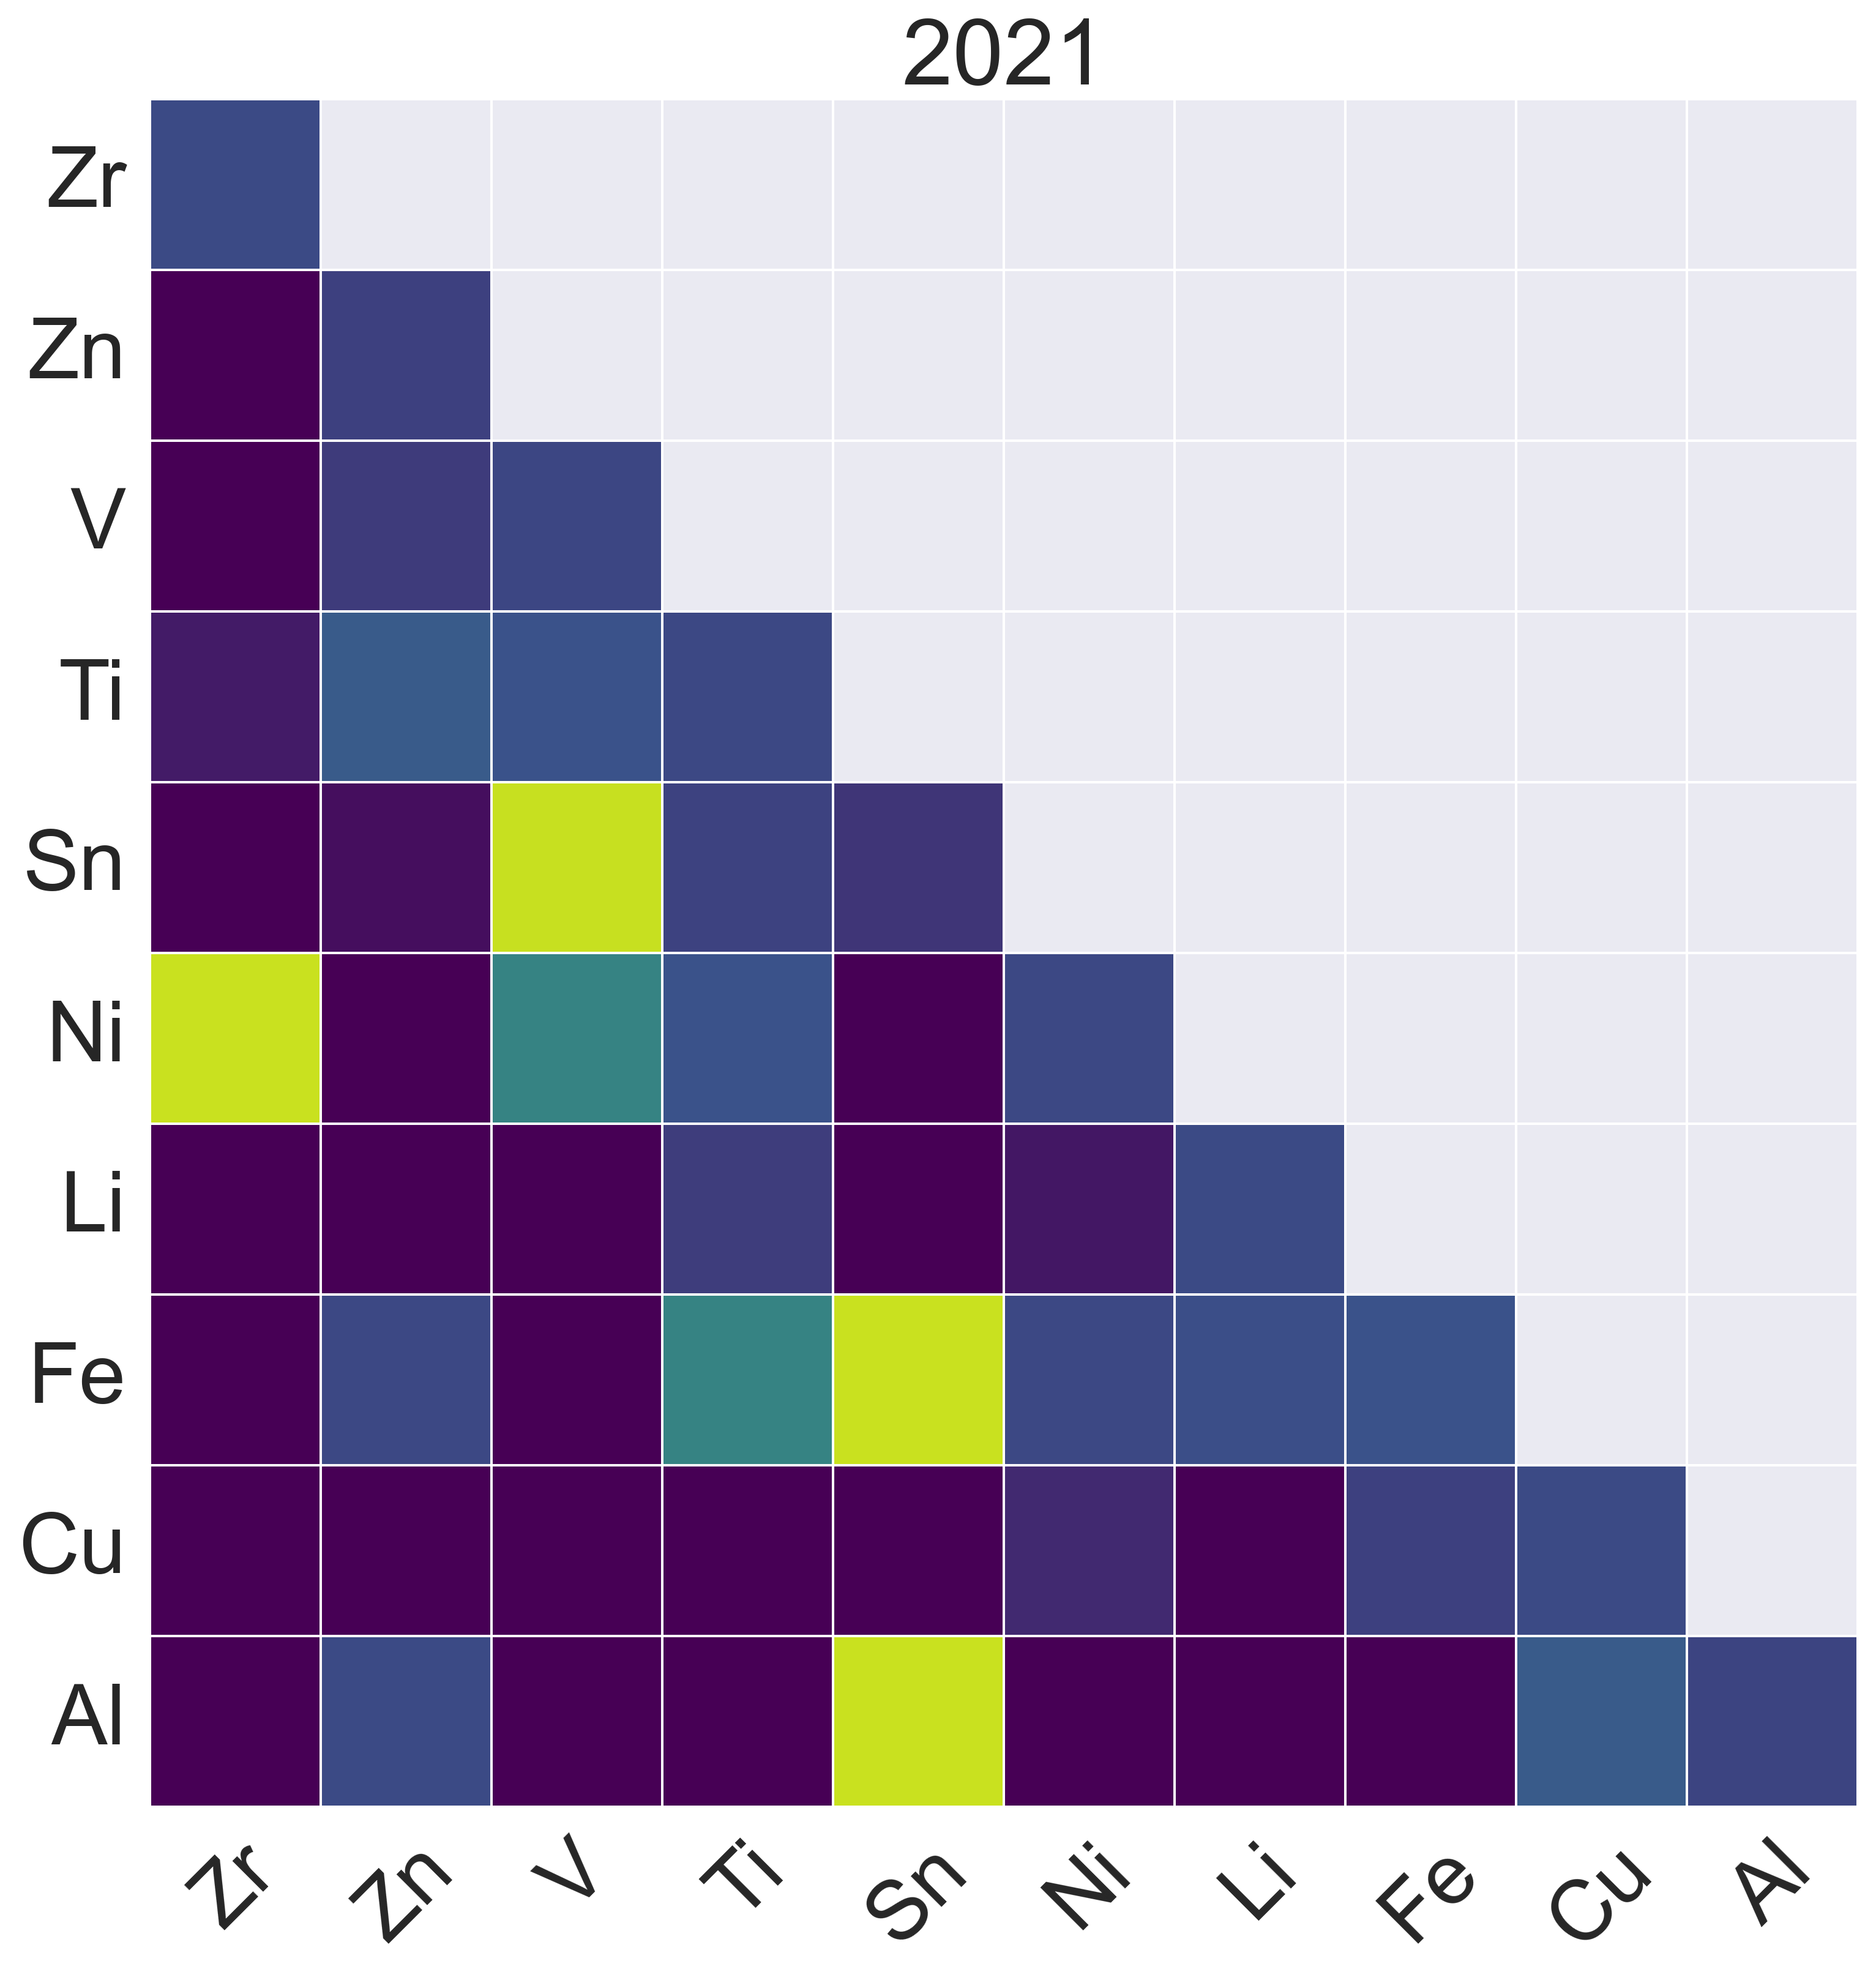

[[0.85], [1.0, 0.8690400508582327], [1.0, 0.8823529411764706, 0.8574144486692015], [0.9444444444444444, 0.8181818181818182, 0.8333333333333334, 0.8554637865311309], [1.0, 0.9714285714285714, 0.5, 0.8666666666666667, 0.8930180180180181], [0, 1.0, 0.75, 0.8333333333333334, 1.0, 0.854602510460251], [1.0, 1.0, 1.0, 0.875, 1.0, 0.95, 0.8484848484848485], [1.0, 0.8518518518518519, 1.0, 0.75, 0, 0.8536585365853658, 0.8421052631578947, 0.8359013867488444], [1.0, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 1.0, 0.8709677419354839, 0.8511705685618729], [1.0, 0.85, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.82, 0.8617511520737328]]


In [39]:
i=0
j=0
l=10
y= 2021 #Start Year
total = 0
data = []
data_NM_TOTAL = []
data_NM_P = []
Freq_NM = []
P_NM = []
Year = 2021
data = [0,0,0]
ELE_R = ELE[::-1]
for i in range(0,10):
    l= l-1
    for j in range(0,10-l):
        for a in ald_mat.keys():
            if group_dict[ELE[i]][j] == a:
                if str(y) in ald_mat[a].keys():
                    for value in ald_mat[a][str(y)].values():
                        total += value
                    data = [total,str(y),group_dict[ELE[i]][j]]

                    data_NM_TOTAL.append(data)
                    if 'o' in ald_mat[a][str(y)].keys():
                        data_P = ald_mat[a][str(y)]['o']/total
                        data = [data_P,str(y),group_dict[ELE[i]][j]]
                    else:
                        data = [0,str(y),group_dict[ELE[i]][j]]
                    data_NM_P.append(data)
                    data_P=0
                else:
                    data = [0,str(y),group_dict[ELE[i]][j]]
                    data_NM_TOTAL.append(data)
                    data_NM_P.append(data)
                total=0
        if group_dict[ELE[i]][j] != data[2]:
            data = [0,str(y),group_dict[ELE[i]][j]]
            data_NM_TOTAL.append(data)
            data_NM_P.append(data)
    P = [x[0] for x in data_NM_P]
    data_NM_P = []
    P_NM.append(P)

#dataframe


df = pd.DataFrame (P_NM, columns = ELE, index = ELE)
fig, ax = plt.subplots(figsize=(12, 16), dpi = 300)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def get_custom_color_palette_hash():
    return LinearSegmentedColormap.from_list("", [
        '#c9e11f', '#c9e11f',
        '#c9e11f','#c9e11f',
        '#32b67a', '#3a538b', '#470055'
    ])
cmap = get_custom_color_palette_hash()
b = sns.heatmap(df,cmap = cmap,vmin=0,vmax=1,
            linewidths=.5,square=True,
            cbar=False)
sns.set(font_scale = 3)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
b.set_title(str(y))
plt.show()    
print(P_NM)